<a href="https://www.kaggle.com/code/aaliyahraderberg/saleprice-housing?scriptVersionId=165801158" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install plotly
import plotly.express as px
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# import the csv files using pandas 
train_df = pd.read_csv('/kaggle/input/housing-prices/train_encoded.csv')
test_df  = pd.read_csv('/kaggle/input/housing-prices/test_encoded.csv')

In [4]:
# Let's explore the dataframe
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,6,65.0,8450,2,NaN,1,1,1,...,0,NaN,NaN,NaN,0,2,2008,1,1,208500
1,2,20,6,80.0,9600,2,NaN,1,1,1,...,0,NaN,NaN,NaN,0,5,2007,1,1,181500
2,3,60,6,68.0,11250,2,NaN,2,1,1,...,0,NaN,NaN,NaN,0,9,2008,1,1,223500
3,4,70,6,60.0,9550,2,NaN,2,1,1,...,0,NaN,NaN,NaN,0,2,2006,1,2,140000
4,5,60,6,84.0,14260,2,NaN,2,1,1,...,0,NaN,NaN,NaN,0,12,2008,1,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,6,62.0,7917,2,NaN,1,1,1,...,0,NaN,NaN,NaN,0,8,2007,1,1,175000
1456,1457,20,6,85.0,13175,2,NaN,1,1,1,...,0,NaN,2.0,NaN,0,2,2010,1,1,210000
1457,1458,70,6,66.0,9042,2,NaN,1,1,1,...,0,NaN,1.0,4.0,2500,5,2010,1,1,266500
1458,1459,20,6,68.0,9717,2,NaN,1,1,1,...,0,NaN,NaN,NaN,0,4,2010,1,1,142125


In [5]:
# Let's explore the dataframe
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,5.0,80.0,11622,2,NaN,1,1,1.0,...,120,0,NaN,2.0,NaN,0,6,2010,1.0,1
1,1462,20,6.0,81.0,14267,2,NaN,2,1,1.0,...,0,0,NaN,NaN,2.0,12500,6,2010,1.0,1
2,1463,60,6.0,74.0,13830,2,NaN,2,1,1.0,...,0,0,NaN,2.0,NaN,0,3,2010,1.0,1
3,1464,60,6.0,78.0,9978,2,NaN,2,1,1.0,...,0,0,NaN,NaN,NaN,0,6,2010,1.0,1
4,1465,120,6.0,43.0,5005,2,NaN,2,3,1.0,...,144,0,NaN,NaN,NaN,0,1,2010,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,8.0,21.0,1936,2,NaN,1,1,1.0,...,0,0,NaN,NaN,NaN,0,6,2006,1.0,1
1455,2916,160,8.0,21.0,1894,2,NaN,1,1,1.0,...,0,0,NaN,NaN,NaN,0,4,2006,1.0,2
1456,2917,20,6.0,160.0,20000,2,NaN,1,1,1.0,...,0,0,NaN,NaN,NaN,0,9,2006,1.0,2
1457,2918,85,6.0,62.0,10441,2,NaN,1,1,1.0,...,0,0,NaN,2.0,4.0,700,7,2006,1.0,1


In [6]:
# Get data frame info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          91 non-null     float64
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   float64
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int64  
 6   Alley          107 non-null    float64
 7   LotShape       1459 non-null   int64  
 8   LandContour    1459 non-null   int64  
 9   Utilities      1457 non-null   float64
 10  LotConfig      1459 non-null   int64  
 11  LandSlope      1459 non-null   int64  
 12  Neighborhood   1459 non-null   int64  
 13  Condition1     1459 non-null   int64  
 14  Condition2     1459 non-null   int64  
 15  BldgType       1459 non-null   int64  
 16  HouseStyle     1459 non-null   int64  
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
# Get the statistics of the data frame
train_df.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,91.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,7.000000,281.000000,54.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,6.126712,70.049958,10516.828082,1.995890,1.450549,1.408219,1.185616,1.001370,...,2.758904,2.285714,2.060498,3.907407,43.489041,6.321918,2007.815753,1.490411,1.582192,180921.195890
std,421.610009,42.300571,1.050330,24.284752,9981.264932,0.063996,0.500305,0.582296,0.606509,0.052342,...,40.177307,1.253566,0.746352,0.445883,496.123024,2.703626,1.328095,1.368616,1.475209,79442.502883
min,1.000000,20.000000,2.000000,21.000000,1300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,34900.000000
25%,365.750000,20.000000,6.000000,59.000000,7553.500000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.500000,2.000000,4.000000,0.000000,5.000000,2007.000000,1.000000,1.000000,129975.000000
50%,730.500000,50.000000,6.000000,69.000000,9478.500000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,2.000000,4.000000,0.000000,6.000000,2008.000000,1.000000,1.000000,163000.000000
75%,1095.250000,70.000000,6.000000,80.000000,11601.500000,2.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,4.000000,0.000000,8.000000,2009.000000,1.000000,1.000000,214000.000000
max,1460.000000,190.000000,8.000000,313.000000,215245.000000,2.000000,2.000000,4.000000,4.000000,3.000000,...,738.000000,4.000000,4.000000,5.000000,15500.000000,12.000000,2010.000000,10.000000,6.000000,755000.000000


In [9]:
#check for missing train data
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

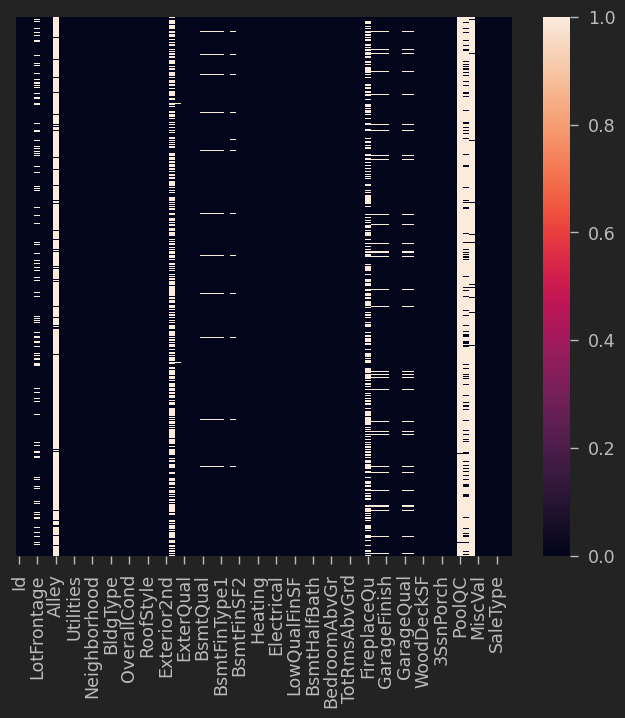

In [10]:
# Nan heatmap
sns.heatmap(train_df.isnull(), yticklabels = False)

In [11]:
# Replace NaN or na values with zeros Train data
train_df = train_df.fillna(train_df.mean())

# Replace NaN or na values with zeros Test data
test_df.fillna(0, inplace=True)

In [12]:
# PREPARE THE DATA BEFORE TRAINING
X = train_df.drop(columns=['SalePrice'])  # Features
y = train_df['SalePrice']  # Target variable

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_valid = model.predict(X_valid)

In [14]:
y_pred_valid

array([152539.70483868, 319719.89276477, 119898.08281736, 182329.28852864,
       324361.05435259,  63771.58499076, 228119.58520547, 138142.61066808,
        55663.44706181, 149248.6632522 , 155236.50439864, 113099.69625625,
        63168.45903322, 214648.06916795, 171981.59585128, 132698.49506037,
       208151.49237601, 135024.65711776, 130046.81829119, 230048.81999854,
       142973.77440094, 204594.43069848, 197411.02772863, 125028.91545938,
       219011.39010427, 163097.85059379, 219186.41099762,  69645.38723384,
       162565.90514651, 199649.88106616, 120778.90157018, 260076.08831934,
       195925.78006291,  99983.05546953, 260909.09354372, 140728.14895905,
       139323.20625015, 214223.14814215, 296379.09122932, 105478.57272242,
       118064.15766743, 244817.99966511, 102349.43792508, 308489.43905089,
       121813.24429511, 117715.25757852,  97377.48859777, 130848.30855345,
       375656.61574171, 136191.95047794, 109932.29483704, 211373.55215563,
       101754.30591511, 3

In [15]:
# Evaluate the model
mse = mean_squared_error(y_valid, y_pred_valid)
print("Mean Squared Error:", mse)

# Make predictions on the test set
y_pred_test = model.predict(test_df)

# Round SalePrice to zero decimals
y_pred_test_rounded = y_pred_test.round(0)

Mean Squared Error: 1202303388.2623868


In [16]:
result_train = model.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.8453576226205276


In [17]:
# Combine the test index with the predicted sale prices
submission_df = pd.DataFrame({'Id': range(1461, len(test_df) + 1461), 'SalePrice': y_pred_test_rounded})

# Output the submission file
submission_df.to_csv('/kaggle/working/submission.csv', index=False)
